# **Cardioviscular Disease Prediction Using Machine Learning**

# **Problem Statement :**

 Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

# **Aim :**
To classify / predict whether a patient is prone to heart failure depending on multiple attributes.

It is a binary classification with multiple numerical and categorical features.

# **Dataset Description:**


•	Age : age of the patient [years]

•	Sex : sex of the patient [M: Male, F: Female]

•	ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

•	RestingBP : resting blood pressure [mm Hg]

•	Cholesterol : serum cholesterol [mm/dl]

•	FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

•	RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

•	MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]

•	ExerciseAngina : exercise-induced angina [Y: Yes, N: No]

•	Oldpeak : oldpeak = ST [Numeric value measured in depression]

•	ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

•	HeartDisease : output class [1: heart disease, 0: Normal]


# **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Data Loading and Cleaning**

In [ ]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
data=pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **overview of the dataset**

In [ ]:
data.shape

(918, 12)

# **we have 918 rows and 12 columns in our dataset**

# **checking for null values in our dataset**

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# **so, there no null values  in our dataset**

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
data['HeartDisease']=data['HeartDisease'].astype('str')

In [ ]:
# CHECK THE DATATYPES OF ALL COLUMNS:

print(data.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease       object
dtype: object


# **checking for numerical and categorical features**


 Keeping a basic concept in my mind, if a column contains continuous values then it will have good quantity of Unique Values.
Taking 25 as that threshold :

data[feature].unique())>25

will do our work

In [ ]:
Numerical_features = [feature for feature in data.columns if len(data[feature].unique())>25]
print('Numerical Values are : {}'.format(Numerical_features))


Numerical Values are : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [ ]:
Categorial_features = [feature for feature in data.columns if len(data[feature].unique())<25]
print('Categorial Values are : {}'.format(Categorial_features))


Categorial Values are : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


# Check Missing Data
One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification( such as KNN algorithm). Also, most Machine learning models could not be applied in the presence of such missing values. Hence it is necessary to identify missing values and treat them.

In the code below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.

In [ ]:
data.replace(['unknown','Na'],np.nan,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


# **there is no missing values in our dataset**

# **Check for Class Imbalance**

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification.

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance.

In [ ]:
# we are finding the percentage of each class in the feature 'HeartDisease'
print(data['HeartDisease'].value_counts())
print("=="*50)
class_values = (data['HeartDisease'].value_counts()/data['HeartDisease'].value_counts().sum())*100
print(class_values)

1    508
0    410
Name: HeartDisease, dtype: int64
1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64


Text(0.5, 1.0, 'HeartDisease')

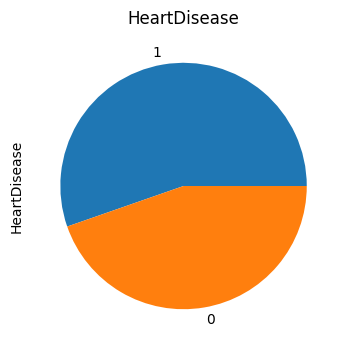

In [ ]:
# Plotting a Pie Chart to visualise the class imbalance
plt.figure(figsize=(20,4))
#plt.subplot(121)
data["HeartDisease"].value_counts().plot(kind='pie')
plt.title("HeartDisease")

# **Detect outliers in the numeric columns**
### Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

### One method of defining outliers are: outliers are data points lying beyond (third quartile + 1.5xIQR) and below (first quartile - 1.5xIQR).

In [ ]:
def detect_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))
for col in Numerical_features:
    print(detect_outliers(data[col]))

(array([], dtype=int64),)
(array([109, 123, 189, 190, 241, 274, 275, 278, 314, 365, 372, 399, 411,
       423, 449, 475, 550, 585, 592, 673, 702, 725, 732, 759, 774, 780,
       855, 880]),)
(array([ 28,  30,  69,  76, 103, 149, 250, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
       338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
       364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
       377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       421, 423, 424, 427, 428, 429, 430, 434, 435, 436, 437, 438, 439,
       440, 441,


# Observations :
### As per the IQR methodology, there are outliers in all of the columns.
### In the further steps below, we will see how to deal with the outliers (winsorization)





# **EDA & Data Visualizations**

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

# **Univariate analysis of Categorical columns**
### Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

### If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.

### The code plots the frequency of all the values in the categorical variables.

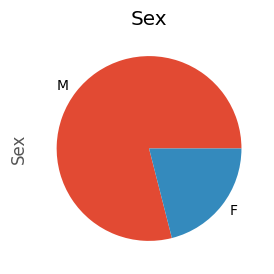

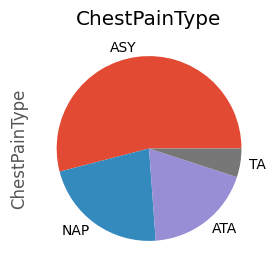

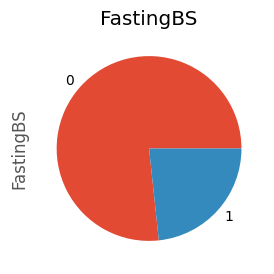

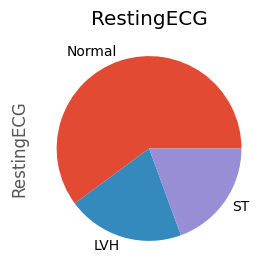

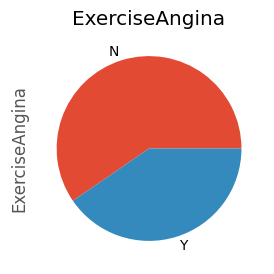

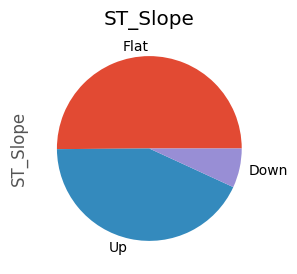

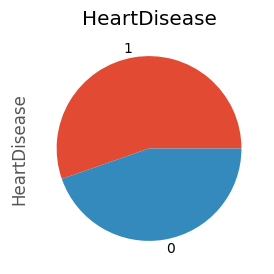

In [ ]:
plt.style.use('ggplot')
# Plotting a bar chart for each of the categorical variable
for column in Categorial_features:
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    data[column].value_counts().plot(kind='pie')
    plt.title(column)

# **Obsevations:**
Most of the chest pain type is asymptomatic.

Majority of the resting ecg is normal.



# **Univariate analysis of Continuous columns**

### Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers.

### The code below plots a histogram of all the continuous features and other that plots a boxplot of the same.

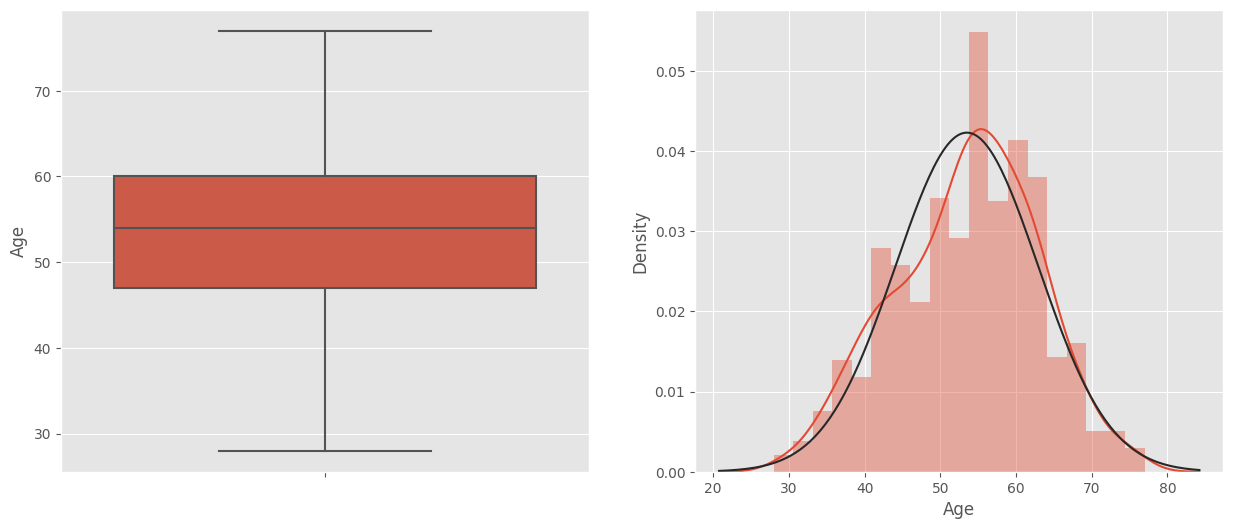

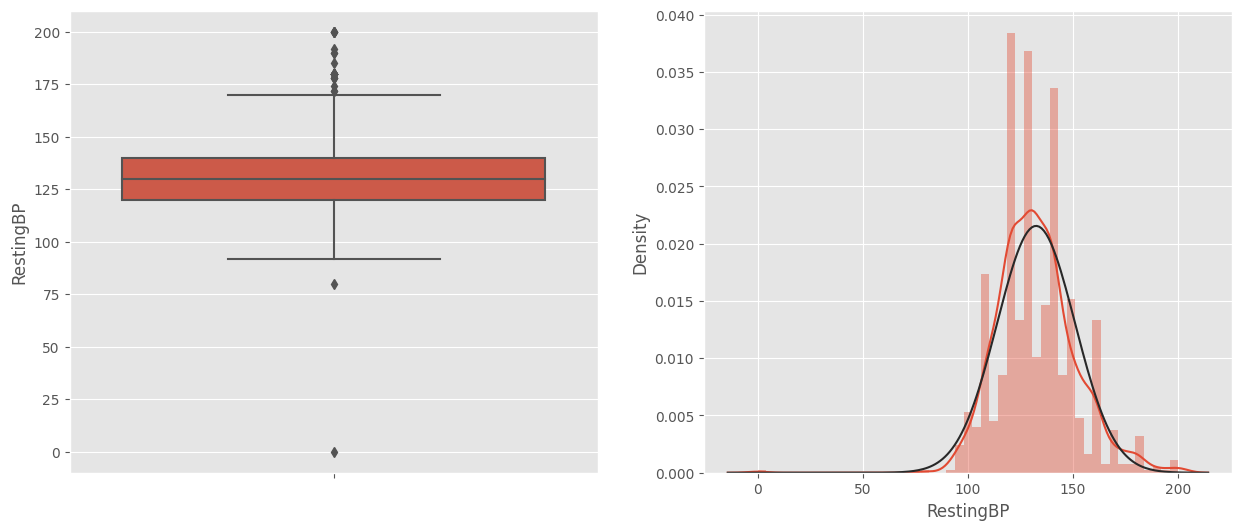

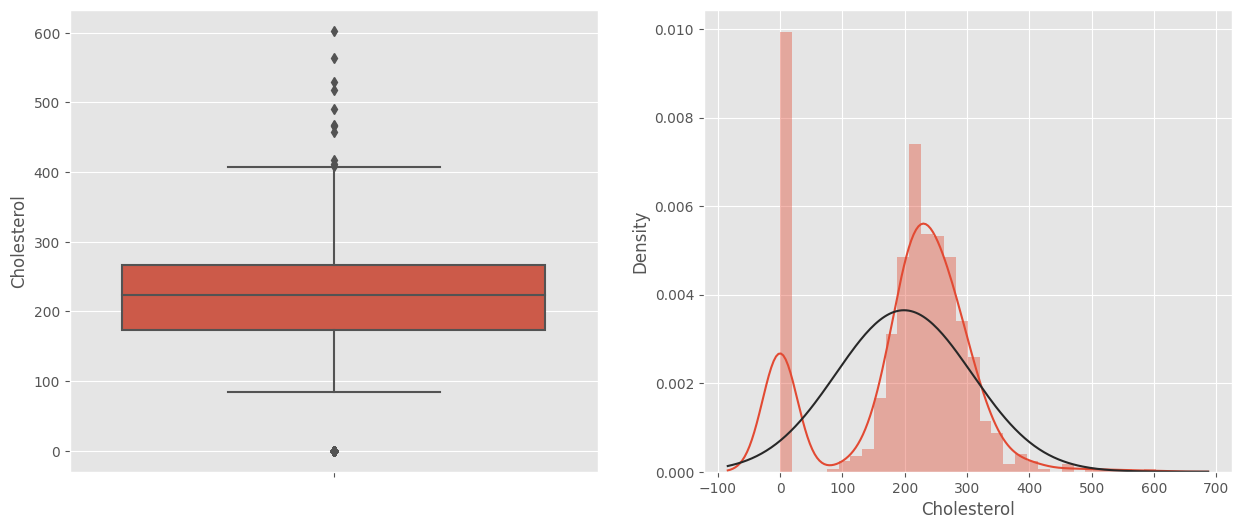

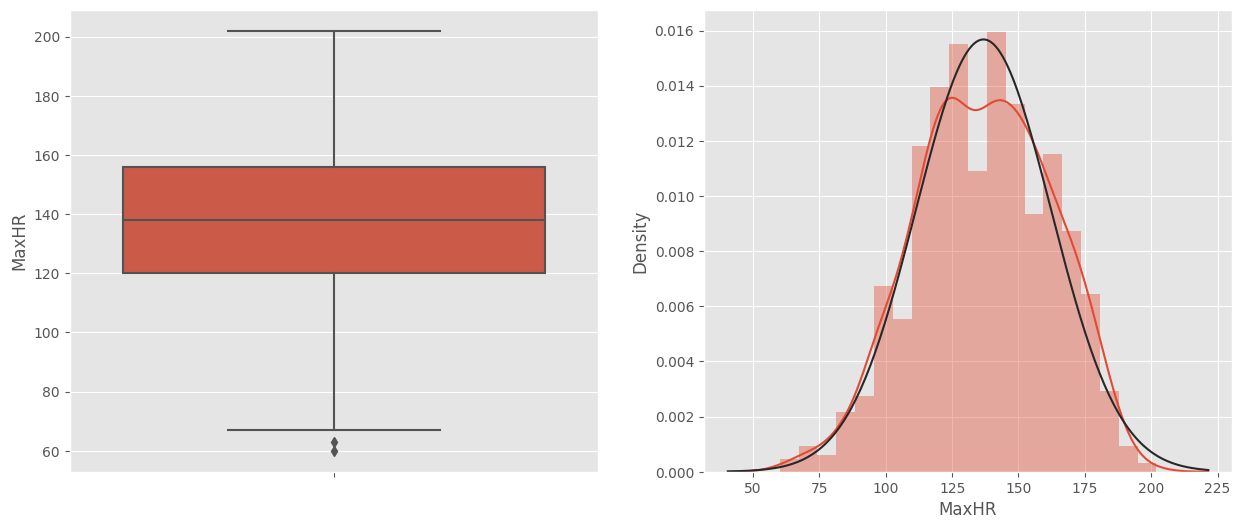

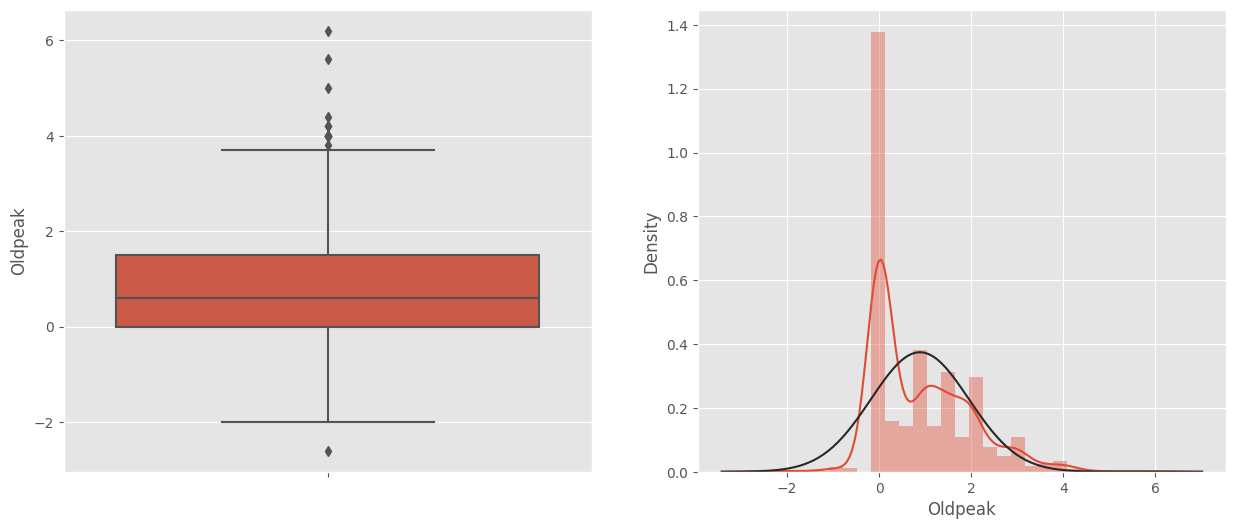

In [ ]:
for var in Numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna(),fit=norm)

    fig.set_xlabel(var)

    plt.show()

## **Treating outliers in the continuous columns**
Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
To reduce left skewness, we take squares or cubes or higher powers.
But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
Hence for this data we use a method called Winsorization. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

In [ ]:
for col in Numerical_features:
  data[col] = winsorize(data[col], limits=[0.1, 0.1],inclusive=(True, True))

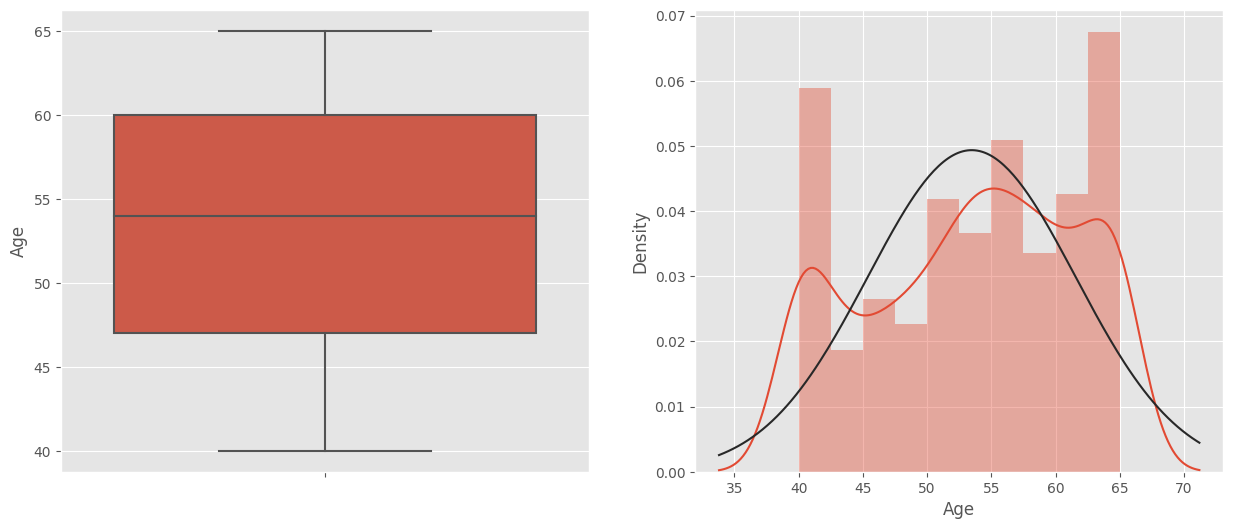

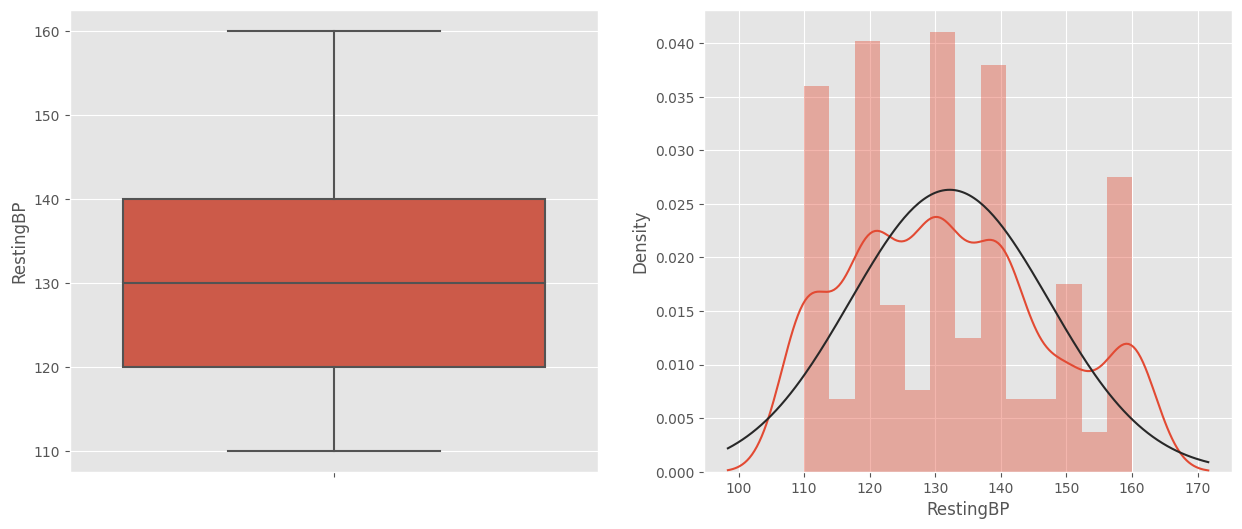

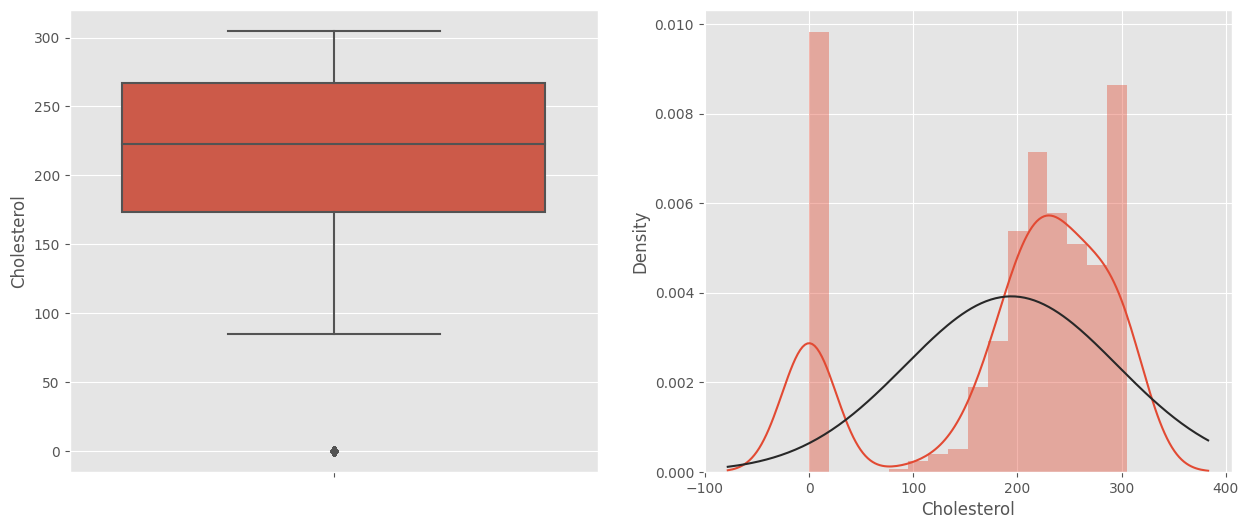

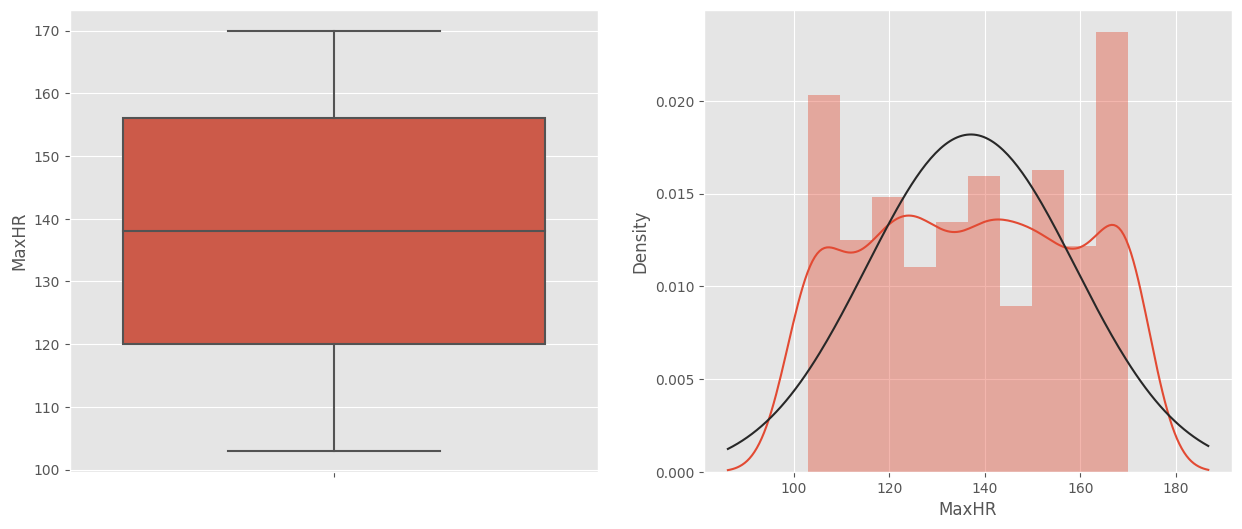

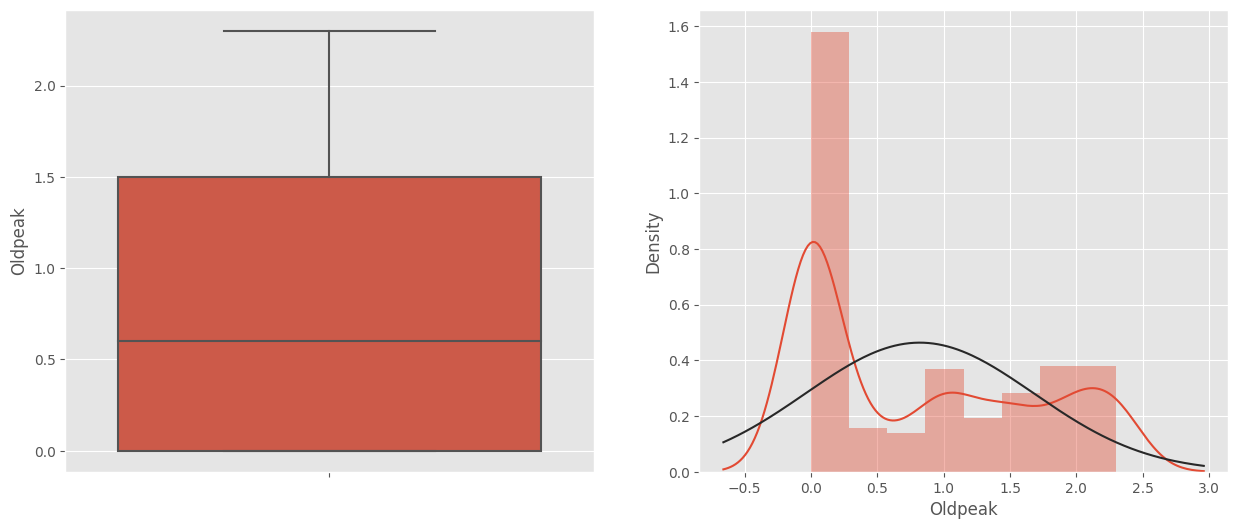

In [ ]:
#Visualising the numeric col after outlier removal ( winsorization) using boxplots and histograms
for var in Numerical_features :
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna(),fit=norm)

    fig.set_xlabel(var)

    plt.show()


# **Bivariate Analysis - Categorical Columns**
### Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below,
### we plot every categorical feature against the cardio by plotting a barchart.

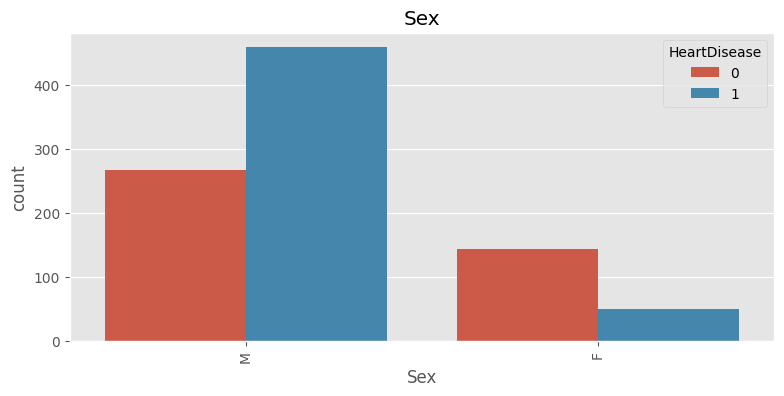

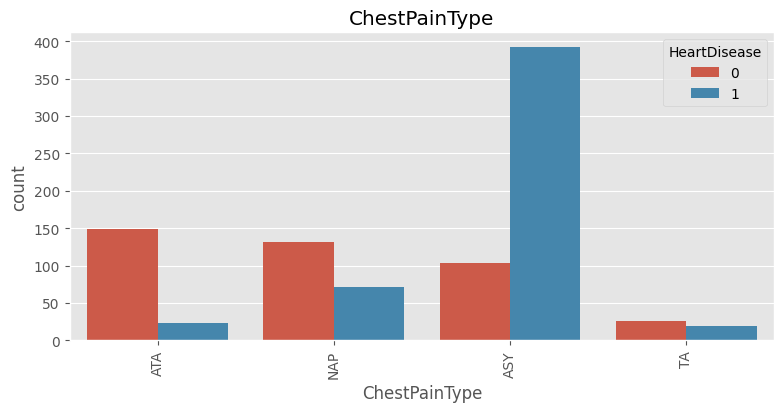

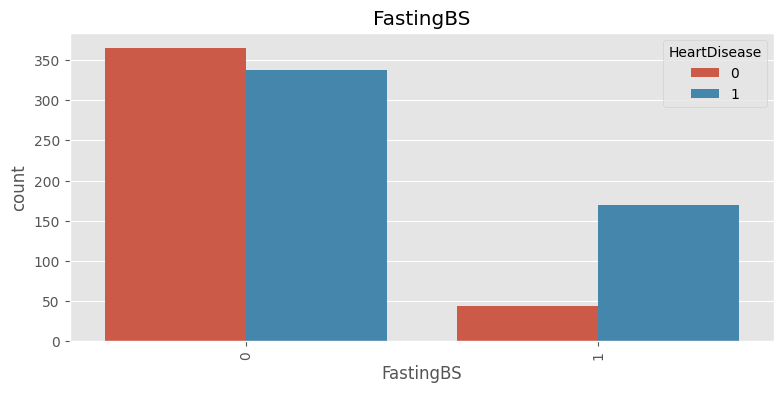

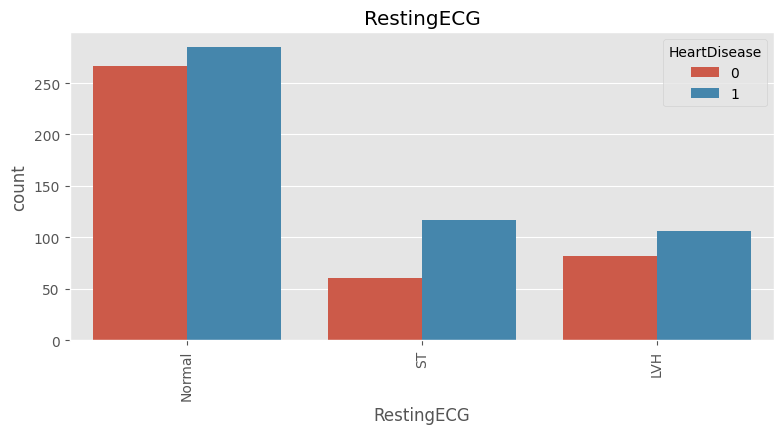

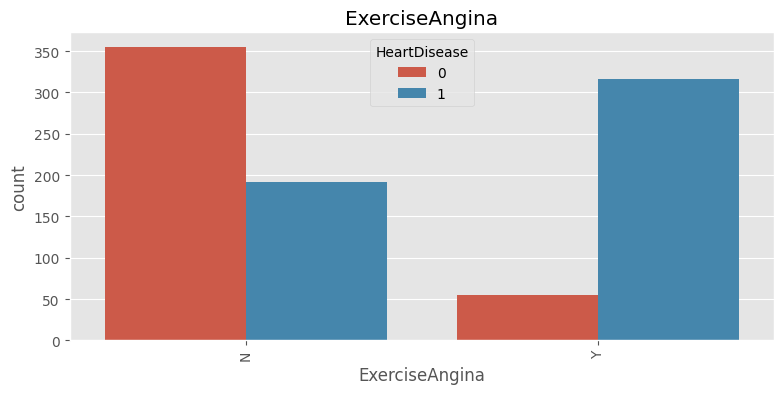

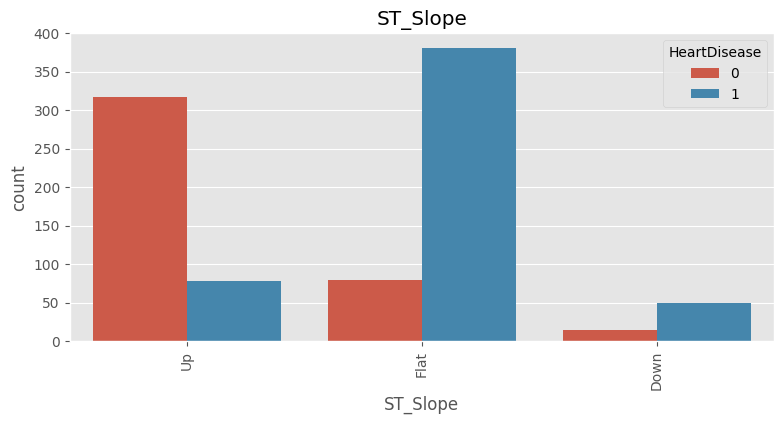

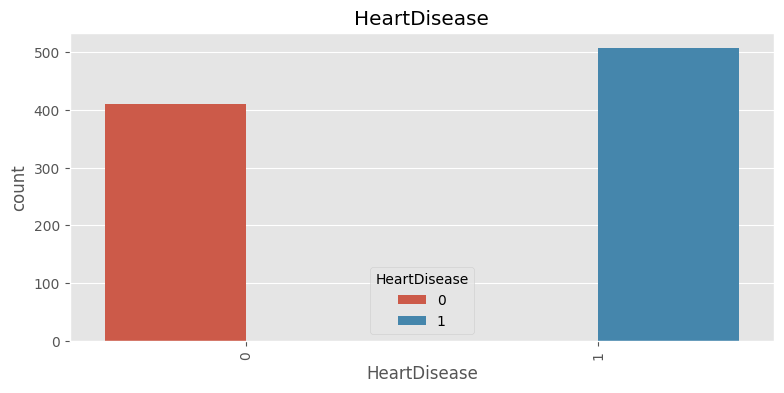

In [ ]:
for column in Categorial_features :
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=data[column],hue=data['HeartDisease'],data=data)
    plt.title(column)
    plt.xticks(rotation=90)

# **Observations:**


•	Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.

•	ASY type of chest pain boldly points towards major chances of heart disease.

•	Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.

•	RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.

•	Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.

•	With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.



In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

data['Oldpeak'] = mms.fit_transform(data[['Oldpeak']])
data['Age'] = ss.fit_transform(data[['Age']])
data['RestingBP'] = ss.fit_transform(data[['RestingBP']])
data['Cholesterol'] = ss.fit_transform(data[['Cholesterol']])
data['MaxHR'] = ss.fit_transform(data[['MaxHR']])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.666682,M,ATA,0.514825,0.931709,0,Normal,1.501059,N,0.000000,Up,0
1,-0.553135,F,NAP,1.834042,-0.138667,0,Normal,0.862581,N,0.434783,Flat,1
2,-1.666682,M,ATA,-0.144783,0.872789,0,ST,-1.554514,N,0.000000,Up,0
3,-0.676862,F,ASY,0.382903,0.195212,0,Normal,-1.326486,Y,0.652174,Flat,1
4,0.065503,M,NAP,1.174434,0.008633,0,Normal,-0.688008,N,0.000000,Up,0


In [ ]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.276446,-0.109755,0.201554,-0.365594,0.279856
RestingBP,0.276446,1.000000,0.083841,0.074480,-0.111212,0.159339
Cholesterol,-0.109755,0.083841,1.000000,-0.282165,0.250751,0.006516
FastingBS,0.201554,0.074480,-0.282165,1.000000,-0.123773,0.099232
MaxHR,-0.365594,-0.111212,0.250751,-0.123773,1.000000,-0.217759
Oldpeak,0.279856,0.159339,0.006516,0.099232,-0.217759,1.000000


# **Function to Label Encode Categorical variables**
### Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:

### Label Encoding
### One-Hot Encoding.
###For the given dataset, we are going to one-hot encode the categorical columns.

In [ ]:
 # Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder
le= OneHotEncoder()
for feature in Categorial_features:
    data[feature] = le.fit_transform(np.array(data[feature]).reshape(-1,1)).toarray()


# **Correaltion Heatmap**

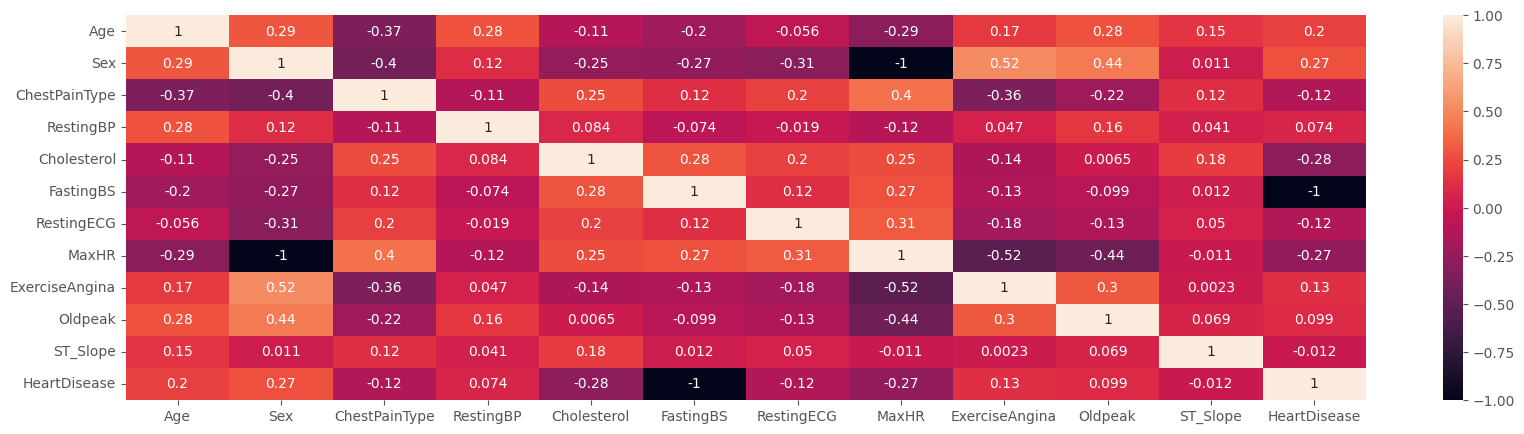

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(data.corr(),annot = True);

#Feature engineering

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

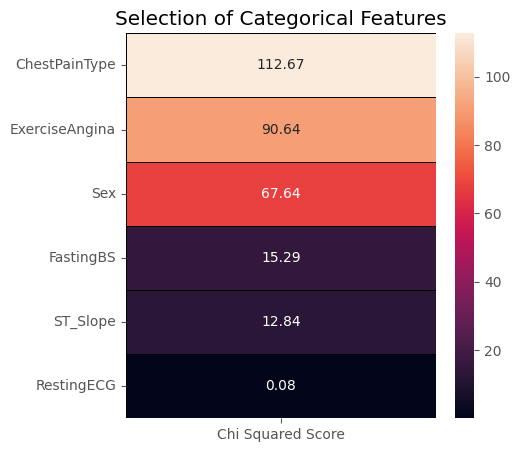

In [ ]:
features = data.loc[:,Categorial_features[:-1]]
target = data.loc[:,Categorial_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

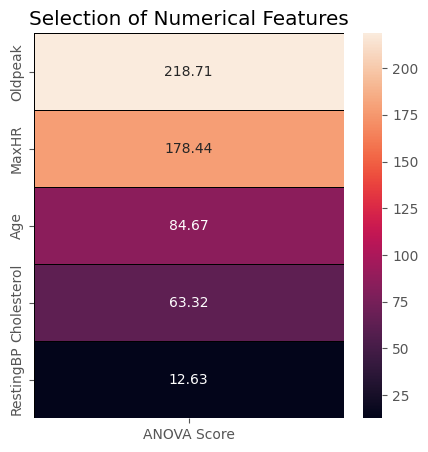

In [ ]:
from sklearn.feature_selection import f_classif

features = data.loc[:,Numerical_features]
target = data.loc[:,Categorial_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [ ]:
data=data.drop([ 'RestingBP','RestingECG'],axis=1)

#modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
data

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.666682,0.0,0.0,0.931709,1.0,1.501059,1.0,0.000000,0.0,1.0
1,-0.553135,1.0,0.0,-0.138667,1.0,0.862581,1.0,0.434783,0.0,0.0
2,-1.666682,0.0,0.0,0.872789,1.0,-1.554514,1.0,0.000000,0.0,1.0
3,-0.676862,1.0,1.0,0.195212,1.0,-1.326486,0.0,0.652174,0.0,0.0
4,0.065503,0.0,0.0,0.008633,1.0,-0.688008,1.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
913,-1.048045,0.0,0.0,0.686210,1.0,-0.231953,1.0,0.521739,0.0,0.0
914,1.426505,0.0,1.0,-0.011007,0.0,0.178498,1.0,1.000000,0.0,0.0
915,0.436685,0.0,1.0,-0.619845,1.0,-1.007247,0.0,0.521739,0.0,0.0
916,0.436685,1.0,0.0,0.411251,1.0,1.501059,1.0,0.000000,0.0,0.0


In [ ]:
print('Shape of the data is: ',data.shape)

Shape of the data is:  (918, 10)


# **PREPARING THE TRAIN AND TEST DATA**

In [ ]:
#Predictor Variables
X = data.iloc[:,:-1]

# Target Variable
y = data.iloc[:,-1]
pd.value_counts(y)

0.0    508
1.0    410
Name: HeartDisease, dtype: int64

In [ ]:
X.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.666682,0.0,0.0,0.931709,1.0,1.501059,1.0,0.000000,0.0
1,-0.553135,1.0,0.0,-0.138667,1.0,0.862581,1.0,0.434783,0.0
2,-1.666682,0.0,0.0,0.872789,1.0,-1.554514,1.0,0.000000,0.0
3,-0.676862,1.0,1.0,0.195212,1.0,-1.326486,0.0,0.652174,0.0
4,0.065503,0.0,0.0,0.008633,1.0,-0.688008,1.0,0.000000,0.0


In [ ]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: HeartDisease, dtype: float64

In [ ]:
# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=2)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((734, 9), (184, 9), (734,), (184,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

# **RUNNING LOGISTIC REGRESSION MODEL**

In [ ]:
model = LogisticRegression()

# fitting the model
model.fit(x_train, y_train)

# predicting the values
y_scores = model.predict(x_val)
y_scores

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        95
         1.0       0.84      0.78      0.81        89

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



AREA UNDER THE CURVE IS :  0.8192193968066233
ROC_AUC_SCORE is 0.8192193968066233


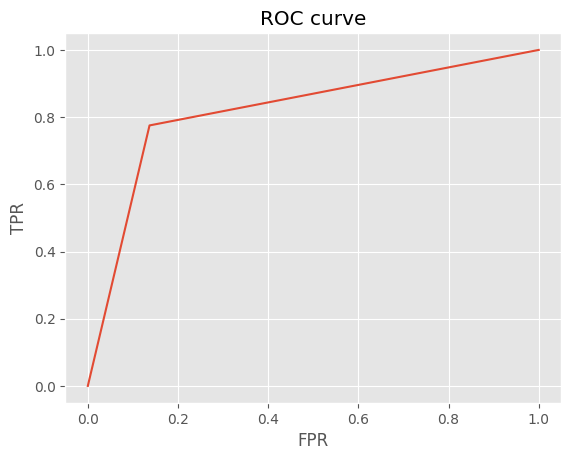

In [ ]:
# getting the auc roc curve

auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# **RUNNING DECISION TREE CLASSIFIER**

In [ ]:
dtcmodel = DecisionTreeClassifier()
dtcmodel.fit(x_train, y_train)
y_scores = dtcmodel.predict(x_val)
y_scores

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        95
         1.0       0.77      0.81      0.79        89

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



AREA UNDER THE CURVE IS :  0.7887049083382613
ROC_AUC_SCORE is 0.7887049083382613


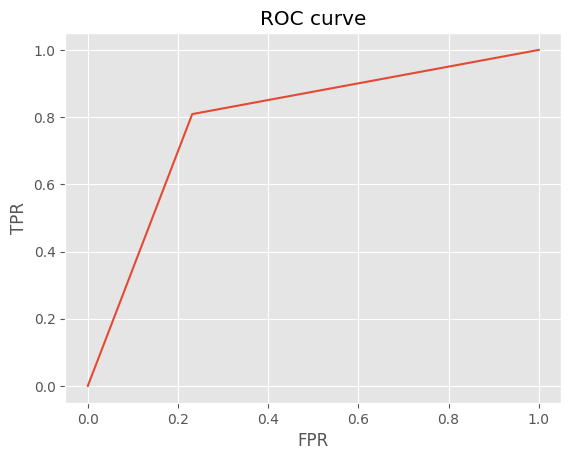

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))


plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# **RUNNING RANDOM FORREST CLASSIFIER**

In [ ]:
rfcmodel = RandomForestClassifier()

rfcmodel.fit(x_train, y_train)
y_scores = rfcmodel.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        95
         1.0       0.86      0.74      0.80        89

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



AREA UNDER THE CURVE IS :  0.8128917800118274
ROC_AUC_SCORE is 0.8128917800118274


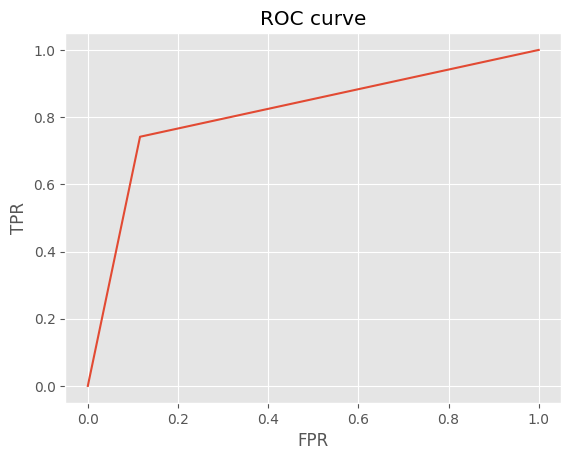

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))


plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# **RUNNING SUPPORT VECTOR MACHINE**

In [ ]:
svc=SVC()
svc.fit(x_train, y_train)
y_scores = svc.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84        95
         1.0       0.84      0.80      0.82        89

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



AREA UNDER THE CURVE IS :  0.8251921939680662
ROC_AUC_SCORE is 0.8251921939680662


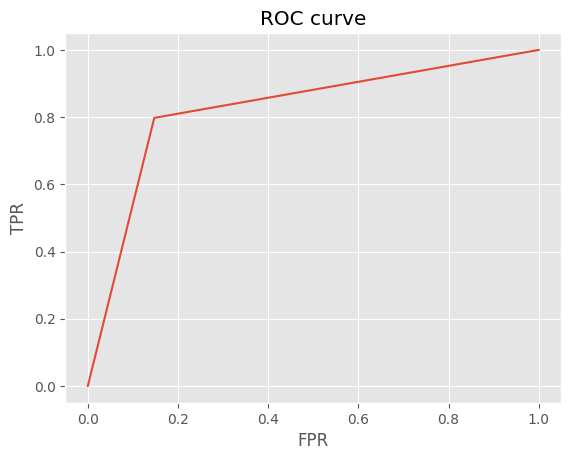

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))


plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# **XGBoost Classifier**

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train, y_train)
y_scores = xgb.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        95
         1.0       0.77      0.70      0.73        89

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184



AREA UNDER THE CURVE IS :  0.7483146067415731
ROC_AUC_SCORE is 0.7483146067415731


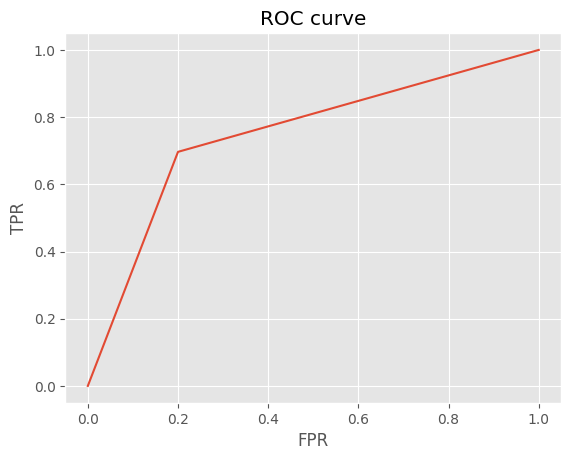

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))


plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### From the above classification reports and AUC-ROC curve we get that only Logistic Regression, Support vector classifier and Random Forrest models are of significance.

# **Feature Importance**




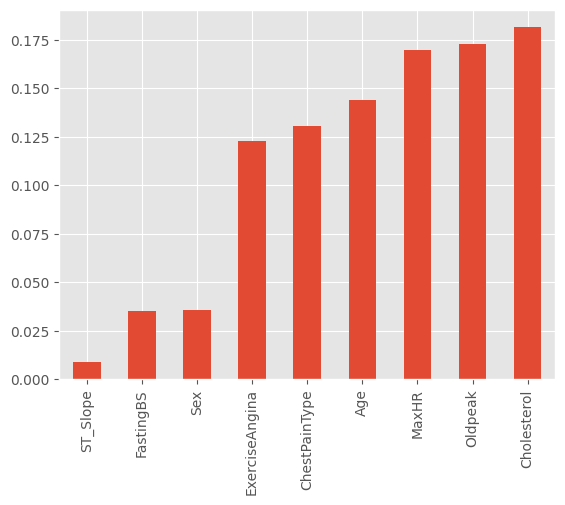

In [ ]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

  "Cholestrol" is the feature which have the highest importance in our model, followed by "Oldpeak","MaxHR" and"Age".

# **Hyper parameter tunning**

In [ ]:
#Create a dictionary and fill out some parameters for kernels, C and gamma
grid_parameters = {'C':np.linspace(0,1,10), 'gamma':np.linspace(0,1,10),'kernel': ['poly','rbf', 'sigmoid','linear']}
grid = GridSearchCV(SVC(),grid_parameters,refit=True)
print(grid.fit(x_train,y_train))

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'gamma': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']})


In [ ]:
print(grid.best_params_)

{'C': 0.4444444444444444, 'gamma': 0.1111111111111111, 'kernel': 'sigmoid'}


In [ ]:
grid.fit(x_val,y_val)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'gamma': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']})

In [ ]:
grid_predictions=grid.predict(x_val)
print(classification_report(y_val,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        95
         1.0       0.86      0.83      0.85        89

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# **Conclusion Part:**

*Outcomes:*
 1. Support Vector Machine Classification is the best suit for this dataset, which gives the highest accuracy and precision although Random Forest and Logistic Regression models have significant AUC of ROC curve.

 2. Cholestrol is the most important feature which influence the pateint to heart disease.

*Chalanges which we have faced:*
1. We have some outliers in our dataset which we needs to be treated accordingly.


*Final Verdict:*
Support Vector Classification is the best fit for this dataset and Cholestrol is the most influencing feature for heart disease. So the patients should try to control their cholestrol level to avoid the chances of heart disease.